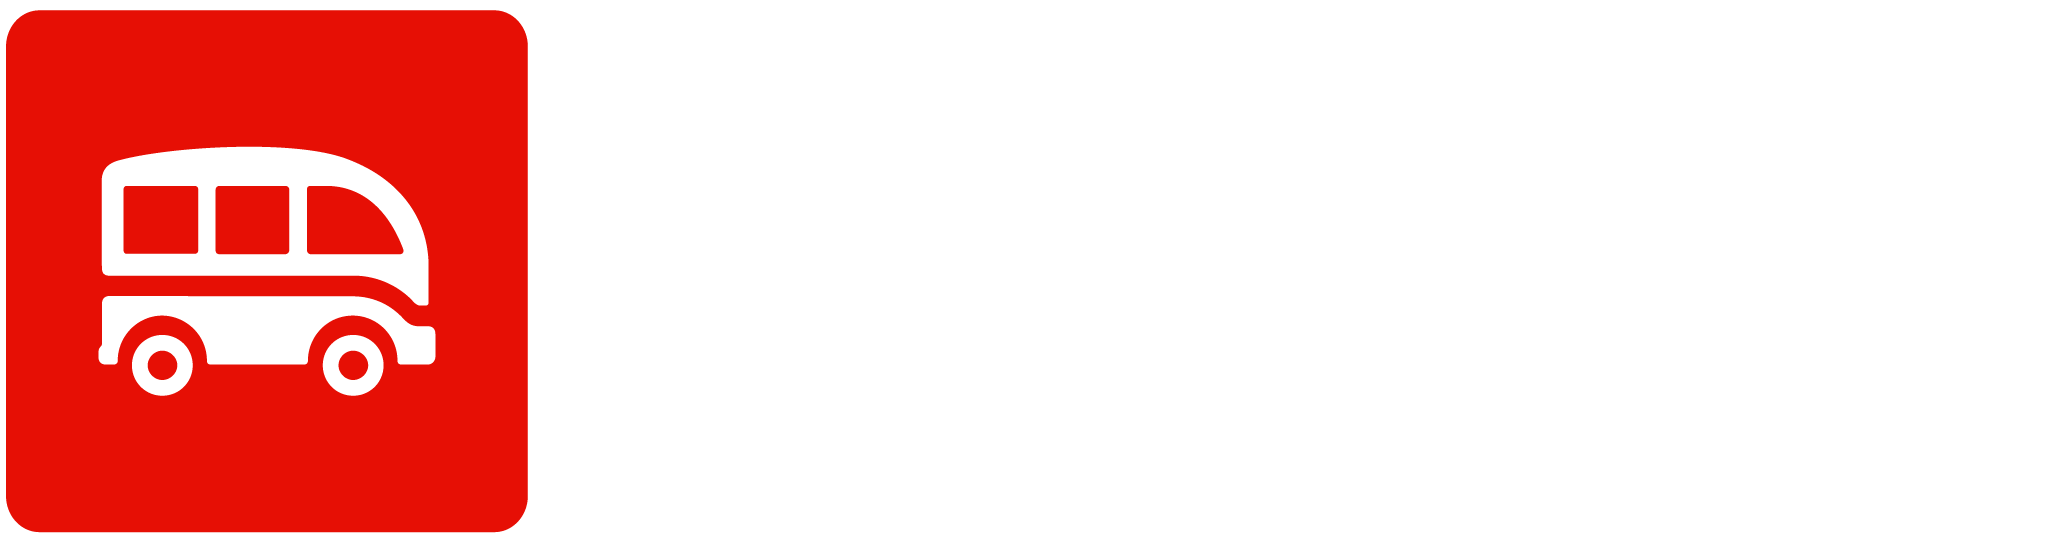

In this notebook, we will work on Airbnb data.

The objective will be to load the data, clean and format it, before exploring and analyzing it.

You will be a Data Analyst trying to answer the following problems:    

* Is the average price difference between "entire home" and "private room" properties significant?
* Does a host's response time affect its final review score?
* Price trend analysis: are hosts taking advantage of the calendar to set their prices?

At the end of the notebook, we will ask you to answer questions about the project management of a Data Analyst.

Finally, you will make a 5-minute Loom video to present your work.

# Data Description

Data collected on the Airbnb website on September 9, 2022.

Detailed description:
- **calendar**: Table gathering reservation calendar information. Contains prices and availability for coming year.
    - *listing_id*: id of the accommodation
    - *date*: day of possible reservation
    - *available*: availability/unavailability of the accommodation
    - *price*: price according to the day
- **listing**: Table with an overview of the accommodations.
    - *id* : Airbnb's unique identifier for the listing (accomodation)
    - *host_response_time* : The average response time of the host for this accommodation
    - *room_type* : Entire home/apt | Private room | Shared room
    - *review_scores_value* : The average reviews score that the listing has

# 1) Import of data

The files can be downloaded in csv format via these links:


*   [listing](https://drive.google.com/file/d/19MV9XLOYDld3fw79PzIseX3wEmK5P2vD/view?usp=sharing)
*   [calendar](https://drive.google.com/file/d/1w9SWUrRblQhxaa1hkwvQHE943at1iZM5/view?usp=sharing)



You can then import them into your Google Colab environment to start working with

In [1]:
import pandas as pd

Load the files "calendar.csv" into a `calendar` variable

In [5]:
calendar = pd.read_csv('/content/calendar.csv')

Displays the first 10 elements of `calendar`

In [6]:
calendar.head(10)

,listing_id,date,available,price
0,130420,2022-09-10,f,$220.00
1,130420,2022-09-11,f,$210.00
2,130420,2022-09-12,t,$210.00
3,130420,2022-09-13,t,$210.00
4,130420,2022-09-14,t,$210.00
5,130420,2022-09-15,f,$210.00
6,130420,2022-09-16,f,$220.00
7,130420,2022-09-17,f,$220.00
8,130420,2022-09-18,f,$210.00
9,130420,2022-09-19,f,$210.00


Load the file "listing.csv" into a `listing` variable

In [7]:
listing = pd.read_csv('/content/listing.csv')

Displays the first 10 elements of `listing`

In [8]:
listing.head(10)

,id,room_type,host_response_time,review_scores_value
0,130420,Entire home/apt,within a few hours,4.43
1,23441,Entire home/apt,within a day,4.64
2,5396,Entire home/apt,within an hour,4.54
3,7397,Entire home/apt,within an hour,4.72
4,24260,Entire home/apt,within a few hours,4.64
5,137112,Entire home/apt,within an hour,4.61
6,26562,Entire home/apt,within a day,4.98
7,137857,Entire home/apt,within an hour,4.55
8,138548,Entire home/apt,within a few hours,4.79
9,139074,Entire home/apt,within a day,4.85


# 2) Cleaning and formatting

## Date

For the `calendar` dataset, the "date" column is formatted as a "string".

Using the `to_datetime` function, transforms the "date" column to datetime format

In [12]:
calendar['date'] = pd.to_datetime(calendar['date'], format ='%Y-%m-%d')

In [13]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

Create a new column "month" in `calendar` that corresponds to the month of the year.

Use `dt.month` to extract the month from a datetime

In [15]:
calendar['month'] = calendar['date'].dt.month

## Price


In `calendar`, the "price" column is in a particular format :
```
$13,700.00
```
We will try to transform them into `Float` type.

Let's start with a little exercise :

Put the thongs below in the right format. You can use the function `replace`, to replace the commas and the dollar and the function `float` to cast in float.

In [20]:
price_1 = "$200.00"
price_2 = "$13,700.00"

# transform price_1 and price_2 into a float format
price_1 = float(price_1.replace("$","").replace(",",""))
price_2 = float(price_2.replace("$","").replace(",",""))
price_1 ,price_2

(200.0, 13700.0)

Create a function `clean_price`, which takes as input a variable "price" in the format seen above, and returns the price in float format.

In [21]:
def clean_price(price):
  cleaned_price = float(price.replace("$","").replace(",",""))
  return cleaned_price

In `calendar`, set  the "price" column in the right format.

Use the `apply` function with your `clean_price` function

In [23]:
calendar['price'] = calendar['price'].apply(clean_price)
calendar['price']

0        220.0
1        210.0
2        210.0
3        210.0
4        210.0
         ...  
72096    100.0
72097    100.0
72098    100.0
72099    100.0
72100    100.0
Name: price, Length: 72101, dtype: float64

# 3) Data exploration

The objective of this part is to discover the data you have available.

These questions are there only to guide your exploration of the data.

Don't get stuck on one question for too long.

The graphics will be made with this library :

In [24]:
import plotly.express as px

For `calendar` : **display the oldest and the most recent reservation date**.

In [40]:
oldest_date = calendar['date'].dt.date.min()
newest_date = calendar['date'].dt.date.max()
print(f'The oldest reservation date is {oldest_date}, and the most recent reservation date is {newest_date}.')

The oldest reservation date is 2022-09-09, and the most recent reservation date is 2023-01-31.


For `calendar` : **display the number of unique "listing_id"**

In [43]:
listing_number = calendar['listing_id'].nunique()
print(f'The number of unique listing id is {listing_number}.')

The number of unique listing id is 500.


For `calendar` : **display the descriptive statistics of price column (mean, standard deviation etc...)**

In [27]:
calendar['price'].describe()

count    72101.000000
mean       158.020041
std        142.359070
min         30.000000
25%         85.000000
50%        120.000000
75%        175.000000
max       4000.000000
Name: price, dtype: float64

For `calendar`: **display the percentage of days an accommodation is available on average**.

In [61]:
# available days by listing id
available_days = calendar[calendar['available'] == 't'].groupby('listing_id')['date'].count()

# total days by listing id
total_days = calendar.groupby('listing_id')['date'].count()

# percentage of days an accommodation is available
percentage_by_accommodation = ( available_days / total_days ) * 100

# on average
average_percentage = round(percentage_by_accommodation.mean(),2)
print(f'The percentage of days an accommodation is available on average is {average_percentage}%.')

The percentage of days an accommodation is available on average is 29.8%.


For `listing`: **Display the number of accommodations by room_type as a bar graph**

Use the function `px.bar`

In [69]:
room_type_number = listing.groupby('room_type')['id'].count()
px.bar(room_type_number,
       labels = {'room_type':'Room Type','value':'Number of Accommodations'},
       title = 'Number of accommodations by room type'
       )

# 4) Is the average review score different between "entire home" and "private room" properties? Is it significant?

To answer this question, we propose to perform a z-test.

**Why can we do this test? Why not perform a t-test? You can use a line of code to answer**



*   Both of these two tests can determine if 2 variable's mean are different.
*   When the volumns of sample is **more than 30, we couldn't use t-test**.





In [70]:
from statsmodels.stats.weightstats import ztest

With the variable `listing`, create two Dataframe:

*   `home` : listing with `room_type` "Entire home/apt"
*   `private_room` : listing with `room_type` "Private room"



In [74]:
home = listing[listing['room_type'] == 'Entire home/apt']
private_room = listing[listing['room_type'] == 'Private room']

Calculate and display the p-value to answer the problem. We will use the `ztest` function.

In [103]:
z_stat, p_value = ztest(home['review_scores_value'], private_room['review_scores_value'])
print(f'P-value is {p_value}.')

P-value is 0.047917748274801955.


**Taking a threshold at 5%, answer the problem.**

In [86]:
print(p_value < 0.05)

True




*   P-value is smaller than 5%.
*   The difference in average prices between 'Entire home/apt' and 'Private room' is **significant**.





# 5) Does a host's response time affect its final review score?

Airbnb doesn't like it much when hosts take time to respond. It's a real loss of revenue. <br>
We wonder if a host's response time affects the final rating they receive from their guests.

With `listing` : **calculate the proportion of accommodations that have a host with the longest response time, i.e. "a few days or more "**.

In [102]:
# number of host with longest response time
longest_number = len(listing[listing['host_response_time'] == 'a few days or more'])

# total number of accommodations
total_number = len(listing['id'])

# proportion
proportion = round(( longest_number / total_number ) * 100,2)
print(f'"The proportion is {proportion}%')

"The proportion is 4.4%


We propose to calculate the correlation between `host_response_time` and `review_scores_value`, to see if the two variables are correlated. <br>
First, **create a new column "host_response_time_num", which contains the value of host_response_time in numerical values** with the following rule:

*   1 : within an hour
*   2 : within a few hours
*   3 : within a day
*   4 : a few days or more

Use the function `replace`



In [105]:
listing['host_response_time_num'] = listing['host_response_time'].replace('within an hour', 1).replace('within a few hours',2).replace('within a day',3).replace('a few days or more',4)
listing['host_response_time_num']

0      2
1      3
2      1
3      1
4      2
      ..
495    1
496    1
497    1
498    2
499    2
Name: host_response_time_num, Length: 500, dtype: int64

Using the `corr()` function, **calculate the correlation between `host_response_time` and `review_scores_value`.**

In [112]:
# we use host response time num to calculate
corr = listing[['host_response_time_num','review_scores_value']].corr()
corr

,host_response_time_num,review_scores_value
host_response_time_num,1.0000,-0.1804
review_scores_value,-0.1804,1.0000


Using the `px.box` method, **create box plot to represent the two variables.**

We expect "host_response_time_num" on the abscissa and "review_scores_value" on the ordinate

In [113]:
px.box(listing,
    x= 'host_response_time_num',
    y='review_scores_value',
    labels = {'host_response_time_num':'host response time','review_scores_value':'review scores value'}
)

**Conclusion: does the response time of a host influence the final score he will receive from his customers?**


1.   In general, the magnitude of -0.1804 shows there's no strong relation between response time and final score. It's not the only factor influencing review scores.

2.   According to the box chart, the median reviews score is all above 4.5 when the host response in the same day or within a day. But the final median score is getting lower(4.3) when the response time is a few days or more.

3.   The loewest score 2.33 is associated with 'a few days or more', their highest is 4.94, which doesn't get 5 points like others.

3.  In conclusion, the host response time has an negative impact on final scores when response time is too long.


# 6) Pricing trend analysis: are hosting companies taking advantage of the calendar to set their prices?

We wonder if hosts take advantage of the calendar to set their prices. For example higher rates during national holidays.

We assume that Airbnb hosts set their own prices.

For `calendar` : **put the "date" column in index**

Use the function `set_index`

In [114]:
calendar.set_index('date', inplace=True)

With the `resample` function, **calculate the average price per day**.

The result will be stored in a `mean_price` variable

In [119]:
mean_price = calendar['price'].resample('d').mean()
mean_price

date
2022-09-09    153.445545
2022-09-10    157.982000
2022-09-11    155.676000
2022-09-12    155.840000
2022-09-13    155.802000
                 ...    
2023-01-27    162.688000
2023-01-28    163.012000
2023-01-29    159.994000
2023-01-30    156.910000
2023-01-31    156.942000
Freq: D, Name: price, Length: 145, dtype: float64

**Display graphically the evolution of the average daily price**

Use the variable `mean_price` and the function `px.line`


In [123]:
px.line(mean_price,
        labels= {'value':'Average Price'},
        title = 'Average Price over Time'
        )

**How does the average daily price evolve during the Christmas holidays?**



1.   We could observed the peak is during the Christmas holidays.
2.   The average daily price is higher than general during Christmas holidays.


**Calculate and display the percentage of properties that never change the price of their home.**

This can be done by calculating the standard deviation of prices using the function `std`

In [128]:
# calculate the standard deviation of price
std = calendar.groupby('listing_id')['price'].std()

# calculate the number of properties who never change price
never_change = (std == 0).sum()

# percentage
no_price_change_percent = (never_change / len(std)) * 100
print(f'The no price change percentage is {no_price_change_percent}%')

The no price change percentage is 47.0%


**Using the previous questions, do you think hosts take advantage of the calendar to set their prices?**



1.   There are 53% of hosts take advantage of the calendar to set their prices. This indicates that they change the prices according to the high-demand season or low-demand season.
2.   We could consider that more than half hosts increased their price during the holiday season. That's why the average price peak is during the Christmas Holidays. Besides, they also reduce the price during the low-demand season such as November.



# Data Analyst Team

After having answered specific problems, we propose to study the following topic more globally: **Analyze the trend of housing prices on Airbnb.**

1. **Project organization**: Explain in detail how you would organize this analysis work in a team of 4 data analysts (division of tasks, process, work methods, analysis review, time spent etc.)



*   **Division of Tasks:**
    1. Leader of Project : Take the responsability for whole project.
    2. Data collector and cleaner : collecting and cleaning data.
    3. Data Exploration and Visualisation: explorer the data and create visualisation charts to understand the trend.
    4. Data statstics and modeling : performing statstical tests and check the model.
*  **Process & Time:**
    * Work Day 1 - Project launching:
      1. Define the problem to solve: Trend of housing prices.
      2. Assign roles and responsabilities.
      3. Define data sources / dataset /
      4. Set up communication channels & ELT/ETL enviorments tools
    * Work Day 2/3 - Data Collecting & Cleaning
      1. Leader 1 : Define cleaning rules and check data quality.
      1. Data analyst 2 :  collects and upload to datawarehouse, cleaning data.
      3. Data analyst 3 and 4 : offering help if need.
    * Work Day 4/5 - Data Exploration & Visualisation
      1. Leader 1 : Define the features and target for solve the problems, quality check.
      2. Data analyst 3 : Exploring and Creating the Visualisation for showing the solutions.
      3. Data analyst 2 and 4 : offering help if need
    * Work Day 6/7 - Modeling and Statistics
      1. Leader 1 : Review, check and provide feedback.
      2. Data analyst 4 : Statisticals analysis for trend of prices, time series, correlations between features, etc.
      3. Data analyst 2/3 : Reviews and feedback, offering help.
    * Work Day 8/9 - Result and reports
      1. Leader 1: Quality check for all.
      2. Team analyze reviews and reports
    * Work Day 10 - Conclusion and Documentation
      1. Team for conclusion and documentation, presentation if need.
* **Work Methods**
    * Daily meeting for feedback,defining daily missions, solve daily problems.
    * Data quality & Version check
    * Data privacy check
    







2. **Project monitoring**: Explain in a few lines what you would put in place to monitor the progress of the analysis project, the bottlenecks and the solutions brought to it (who are the stakeholders to contact to get the data, how do you report problems in the data...)


*   Team Regular Meeting.
*   Task tracking.
*   Open communication with stakeholders.
*   Use the problem-solving system to create tickets and request for reporting problems.






3. **Project history**: What would you put in place to keep a history of exchanges between team members during your meetings to document the work?



1.   Use a common online document to note the tasks, bottlenecks, solutions, etc at the meeting.
2.   Collaboration, communication tools for discussion.



4. **Project Collaboration**: What tools would you use to foster collaboration among your team of data analysts? Describe in a few lines how you would use these tools.



*   Communication tools : slack,teams, company communication tools.
*   Online documentation : notion, google docs
*   Data warehouse: Bigquery, snowflake, oracle
*   ELT: Airbyte, DBT, Fivetran.
*   Version control : Github.
*   Data Exploration and Analysis : DBT, Google colab, Jupyter, etc
*   Data Visualisation : Looker studio, Power BI, Tableau


# Loom video

Make a video explaining your notebook with your analyses. Imagine that you are presenting the results of your analyses to your hierarchy. Share your screen so that people can see your notebook and your face.
The video should be 5 min maximum.

Copy the public sharing url in your google form.